In [518]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Import the data

In [519]:
df = pd.read_csv('Data.csv')

# Preparation and EDA

In [520]:
df.shape

(22058, 32)

In [521]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [522]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.9,0.162316,128,15,40,0.008528,-0.996048,AB,904,1431.287127,2110.060692,4119.522878,15,7,CA,166,0,BB,0,1,28,0,500.0,0,INTERNET,6.265841,windows,1,1,0,6
1,0,0.1,0.014232,101,3,40,0.001605,-0.771460,AB,1560,6016.759025,4216.901506,4132.260393,0,9,CA,213,1,BA,0,1,1,0,1000.0,0,INTERNET,4.737900,linux,0,1,0,6
2,0,0.1,0.556928,-1,60,50,0.030090,-0.471550,AB,1095,6547.003870,5576.331826,5544.049677,1656,8,CA,46,1,BC,0,1,26,0,200.0,0,INTERNET,14.005306,other,1,1,0,2
3,0,0.9,0.425115,95,51,30,3.312687,51.680454,AA,1691,2979.514508,4011.726813,5214.834746,2,7,CA,88,0,BC,0,1,29,0,200.0,0,INTERNET,2.437244,other,0,1,0,2
4,0,0.8,0.060218,12,6,50,0.037293,-1.009755,AB,632,3850.589519,3680.995818,4205.908274,764,5,CC,97,1,BC,1,0,28,0,200.0,0,INTERNET,2.821325,other,0,1,0,6


In [523]:
df['fraud_bool'].value_counts()

0    11029
1    11029
Name: fraud_bool, dtype: int64

-----Deal with missing values-----

In [524]:
df[df.eq(-1).any(1)]

/tmp/ipykernel_1968/3704744187.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq(-1).any(1)]


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
2,0,0.1,0.556928,-1,60,50,0.030090,-0.471550,AB,1095,6547.003870,5576.331826,5544.049677,1656,8,CA,46,1,BC,0,1,26,0,200.0,0,INTERNET,14.005306,other,1,1,0,2
5,0,0.1,0.274720,-1,49,30,0.017975,-1.352588,AB,2392,6487.151671,6412.975453,6594.546699,18,15,CA,38,1,BC,0,1,30,0,200.0,0,INTERNET,4.071809,windows,1,1,0,0
6,0,0.9,0.638017,-1,52,40,0.030725,-1.447080,AC,851,5687.157285,4681.890984,5070.632819,0,4,CA,99,0,BB,1,1,-1,0,200.0,0,INTERNET,0.997156,other,1,1,0,1
7,0,0.4,0.244714,-1,143,50,0.023826,-0.798536,AB,695,5710.283883,4156.081579,3052.014167,9,8,CA,358,1,BB,0,1,10,1,1500.0,0,INTERNET,2.042651,other,1,1,0,7
8,0,0.2,0.901560,-1,18,20,0.000095,-0.979501,AC,586,4510.952437,2508.448149,3070.001830,2,13,CE,79,1,BE,0,1,-1,0,200.0,0,INTERNET,6.211325,linux,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,1,0.9,0.748805,-1,36,50,0.001004,-0.360484,AB,804,3932.374277,2411.852439,4988.861906,1,5,CA,231,1,BC,0,1,19,0,200.0,0,INTERNET,7.572736,windows,0,1,0,4
22054,1,0.9,0.135050,-1,81,60,0.005337,-1.150811,AC,1247,4475.198876,5673.431787,5084.327676,0,5,CA,120,0,BC,0,1,-1,0,200.0,0,INTERNET,5.080246,windows,0,1,0,4
22055,1,0.5,0.148947,-1,368,60,0.008178,-0.995282,AB,874,1023.894058,4689.707046,4778.328856,8,2,CA,219,0,BA,0,1,30,0,1500.0,0,INTERNET,1.768153,windows,1,1,0,4
22056,1,0.8,0.504183,-1,72,20,0.007644,-0.424105,AD,1770,4387.025301,4452.494062,4847.413704,131,10,CA,57,0,BD,0,0,29,0,500.0,0,INTERNET,9.579747,windows,0,1,0,4


In [525]:
df['prev_address_months_count'][df['prev_address_months_count'] == -1].count()

18042

In [526]:
df['current_address_months_count'][df['current_address_months_count'] == -1].count()

56

In [527]:
df = df.drop(columns=['prev_address_months_count'])

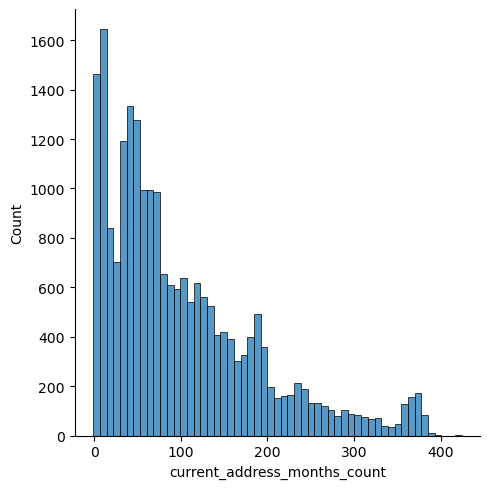

In [528]:
sns.displot(df.current_address_months_count)

In [529]:
df['current_address_months_count'] = df['current_address_months_count'].replace(-1, 0)

In [530]:
pd.set_option('display.max_columns', None)
df[df.eq(-1).any(1)]

/tmp/ipykernel_1968/841425873.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq(-1).any(1)]


,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
6,0,0.9,0.638017,52,40,0.030725,-1.447080,AC,851,5687.157285,4681.890984,5070.632819,0,4,CA,99,0,BB,1,1,-1,0,200.0,0,INTERNET,0.997156,other,1,1,0,1
8,0,0.2,0.901560,18,20,0.000095,-0.979501,AC,586,4510.952437,2508.448149,3070.001830,2,13,CE,79,1,BE,0,1,-1,0,200.0,0,INTERNET,6.211325,linux,1,1,0,7
11,0,0.9,0.736551,97,60,0.001567,-0.848305,AC,455,2683.947149,4574.205827,4347.144840,1,7,CA,254,1,BA,0,1,-1,0,1500.0,0,INTERNET,1.487363,other,1,1,0,4
18,0,0.6,0.753765,40,40,0.011080,-1.166274,AC,2320,4435.515044,3791.228777,5697.223500,1,12,CA,122,1,BB,0,1,-1,0,200.0,0,INTERNET,7.701150,linux,0,1,0,2
19,0,0.8,0.098808,9,20,9.761947,-0.573759,AD,971,6511.137408,6523.641917,4957.019431,11,11,CA,99,1,BC,0,1,-1,0,200.0,0,INTERNET,1.485206,linux,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22042,1,0.9,0.208430,41,40,1.439640,-1.262026,AC,997,7067.454062,5504.976524,4327.209469,0,8,CA,233,1,BA,0,1,-1,0,2000.0,0,INTERNET,7.363194,other,0,1,0,4
22045,1,0.9,0.094405,92,40,0.006467,-1.232084,AC,2352,5011.359950,4801.745900,4795.135787,30,7,CA,120,0,BA,0,1,-1,0,500.0,0,INTERNET,8.088788,windows,0,1,0,4
22048,1,0.6,0.515158,52,50,0.009720,-0.883660,AC,2525,4267.349647,4607.166814,4222.019545,0,12,CC,272,0,BA,0,1,-1,0,2000.0,0,INTERNET,1.080146,windows,0,1,0,4
22049,1,0.9,0.738012,173,40,0.014555,-0.580488,AC,3366,13524.105076,7259.494955,4915.676439,0,6,CA,158,0,BA,0,1,-1,0,500.0,0,INTERNET,6.222278,other,0,1,0,4


In [531]:
df['bank_months_count'][df['bank_months_count'] == -1].count()

6927

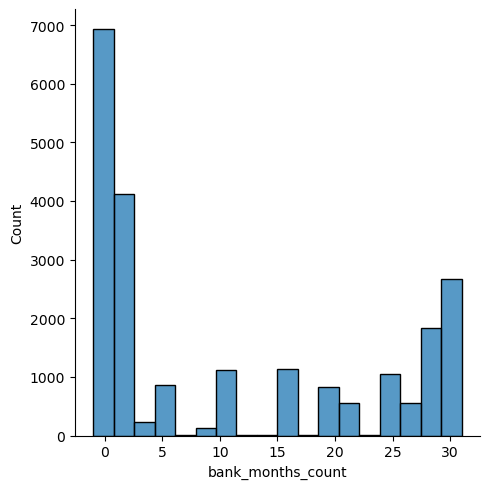

In [532]:
sns.displot(df.bank_months_count)

In [533]:
df[df['bank_months_count'] == -1].loc[df['customer_age'] < 25]

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
8,0,0.2,0.901560,18,20,0.000095,-0.979501,AC,586,4510.952437,2508.448149,3070.001830,2,13,CE,79,1,BE,0,1,-1,0,200.0,0,INTERNET,6.211325,linux,1,1,0,7
19,0,0.8,0.098808,9,20,9.761947,-0.573759,AD,971,6511.137408,6523.641917,4957.019431,11,11,CA,99,1,BC,0,1,-1,0,200.0,0,INTERNET,1.485206,linux,0,1,0,4
25,0,0.9,0.145617,6,20,3.736775,-0.333173,AC,951,776.682786,2805.143493,4318.258249,1,11,CA,99,0,BB,0,1,-1,0,200.0,0,INTERNET,4.276535,windows,1,1,0,5
41,0,0.5,0.270287,44,20,0.004164,-0.723539,AC,1616,14336.362905,6694.644064,5531.825202,0,13,CA,61,1,BC,0,1,-1,0,200.0,0,INTERNET,4.578963,other,1,1,0,2
78,0,0.5,0.995430,0,20,0.015030,-0.732611,AC,679,2166.299618,6386.854944,6827.991065,1220,7,CA,145,0,BC,0,1,-1,0,200.0,0,INTERNET,10.708634,linux,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,1,0.7,0.313589,0,10,0.005386,-0.467593,AC,1742,2927.437719,6229.216324,4908.495380,0,16,CA,183,1,BC,0,1,-1,0,1500.0,0,INTERNET,4.969947,other,1,1,0,4
21979,1,0.9,0.496109,167,20,0.001453,-0.965705,AB,1905,6820.763353,4554.191479,4802.506078,1,10,CA,161,0,BA,0,1,-1,0,500.0,0,INTERNET,1.771729,windows,0,1,0,4
21997,1,0.1,0.142062,5,20,0.035814,-1.343857,AC,1966,2341.624652,2812.921908,3597.002913,0,9,CA,318,1,BC,0,1,-1,0,200.0,1,INTERNET,5.492382,windows,0,1,0,4
22033,1,0.9,0.375460,192,20,0.042463,-0.938874,AC,2470,4370.372877,2628.361234,4357.951571,1,12,CA,180,1,BA,0,1,-1,0,1000.0,0,INTERNET,5.671206,other,0,1,0,4


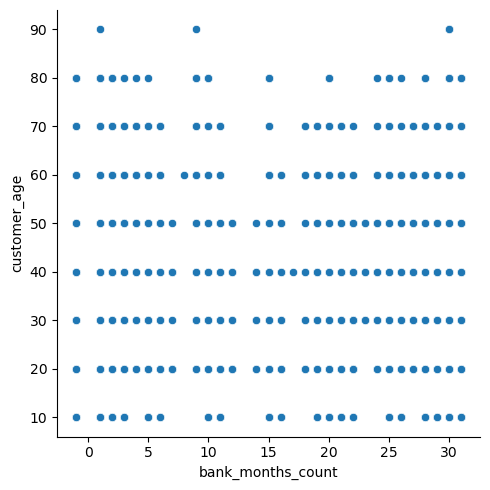

In [534]:
sns.relplot(x=df.bank_months_count, y=df.customer_age)

In [535]:
df['bank_months_count'] = df['bank_months_count'].replace(-1, df['bank_months_count'].loc[df['bank_months_count'] != -1].median())

In [536]:
df[df['device_distinct_emails_8w']==-1]

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
403,0,0.8,0.562765,233,40,0.011685,-0.537098,AB,761,2939.011755,8931.558411,4715.507296,909,5,CD,100,0,BC,0,1,19,1,1500.0,0,TELEAPP,2.649717,windows,0,-1,0,4
750,0,0.2,0.234543,105,40,2.404928,-1.055764,AC,786,3784.244113,4104.122701,3159.840258,0,7,CA,95,0,BB,1,1,15,0,200.0,0,TELEAPP,3.480017,linux,1,-1,0,7
897,0,0.6,0.544069,33,40,0.000565,-0.165516,AB,1717,2602.108864,3429.340476,3143.517182,1,3,CB,203,0,BC,1,1,10,1,1500.0,0,INTERNET,2.207968,other,0,-1,0,0
941,0,0.8,0.566265,12,30,10.766865,-0.751977,AC,1519,7844.274623,5009.345714,5387.220574,1,8,CA,17,1,BC,0,1,15,0,200.0,0,INTERNET,3.386608,other,0,-1,0,1
993,0,0.1,0.862158,57,70,0.434135,16.619138,AA,928,3320.203510,8706.551309,4863.315292,1426,1,CB,103,1,BC,0,1,5,0,200.0,0,TELEAPP,-1.000000,other,0,-1,0,6
4724,0,0.9,0.772754,39,40,0.037975,13.272743,AA,310,8426.223308,6779.617037,6819.542604,1458,5,CB,68,1,BC,1,1,21,0,200.0,0,INTERNET,4.646904,other,0,-1,0,0
5844,0,0.9,0.828963,39,30,0.008014,13.477384,AC,1191,4861.833668,4328.848756,3137.976868,1,10,CB,106,0,BC,1,1,31,1,200.0,0,TELEAPP,-1.000000,other,0,-1,0,7
6483,0,0.1,0.625101,41,60,0.824175,-0.831141,AC,976,5061.709264,2683.660241,4300.282501,1,11,CD,66,1,BB,1,1,15,1,200.0,0,TELEAPP,-1.000000,other,0,-1,0,5
17283,1,0.7,0.110274,41,40,1.622966,-0.966230,AB,890,4462.398665,2743.373306,3855.154776,9,12,CA,342,1,BA,1,0,2,0,1500.0,0,TELEAPP,-1.000000,other,0,-1,0,6
17704,1,0.9,0.132431,127,50,4.106458,-0.528230,AC,4481,3247.272448,7917.541609,6377.813361,1,8,CA,203,1,BA,0,1,15,0,1500.0,0,TELEAPP,-1.000000,other,0,-1,0,0


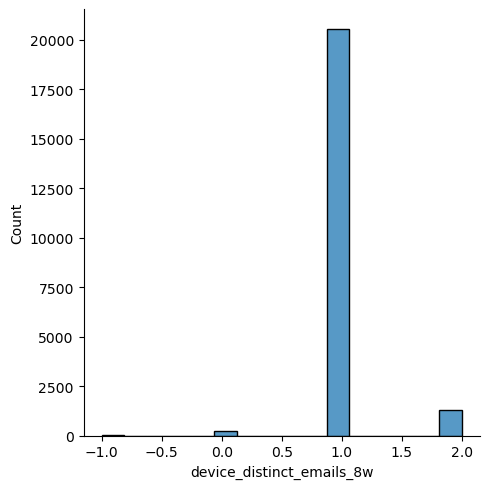

In [537]:
sns.displot(df.device_distinct_emails_8w)

In [538]:
df['device_distinct_emails_8w'] = df['device_distinct_emails_8w'].replace(-1, df.mode()['device_distinct_emails_8w'][0])

In [539]:
df[df.eq(-1).any(1)]

/tmp/ipykernel_1968/3704744187.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq(-1).any(1)]


,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
449,0,0.4,0.797761,50,20,0.024878,-1.370617,AC,2132,5041.094107,4971.903979,5129.442539,1,20,CA,-1,1,BB,0,1,15,0,200.0,0,INTERNET,8.310198,windows,1,1,0,2
688,0,0.7,0.769451,50,20,12.444767,-1.332516,AC,1774,5024.589688,5036.882914,4257.348627,1,15,CA,114,1,BA,0,1,15,0,200.0,0,TELEAPP,-1.000000,other,0,0,0,6
993,0,0.1,0.862158,57,70,0.434135,16.619138,AA,928,3320.203510,8706.551309,4863.315292,1426,1,CB,103,1,BC,0,1,5,0,200.0,0,TELEAPP,-1.000000,other,0,1,0,6
2228,0,0.5,0.841580,165,60,3.331855,-1.582320,AC,1118,2453.612200,4452.389335,5096.381165,1,6,CB,-14,0,BB,1,0,15,0,200.0,0,TELEAPP,-1.000000,other,0,0,0,4
2379,0,0.4,0.252485,250,20,0.000383,-0.212857,AC,2888,5058.264066,4311.316870,5644.574387,6,14,CA,51,1,BE,1,0,15,1,200.0,0,INTERNET,-1.000000,other,1,1,0,2
2529,0,0.4,0.149888,48,30,0.008303,4.866932,AB,1401,6155.778588,2606.294529,4134.828541,10,17,CA,89,0,BC,1,1,2,0,200.0,0,INTERNET,-1.000000,other,1,1,0,7
2628,0,0.2,0.163090,86,60,4.313327,-0.934363,AC,1549,3282.121378,4764.507753,4867.617444,0,6,CC,42,0,BA,1,0,15,0,200.0,0,TELEAPP,-1.000000,other,0,1,0,4
2664,0,0.5,0.117656,45,40,0.003570,-1.432985,AC,2681,3541.588136,4871.866212,4335.710852,1,13,CA,32,1,BB,0,1,15,0,200.0,0,INTERNET,-1.000000,windows,1,1,0,5
2814,0,0.9,0.808354,23,40,0.001775,-1.454176,AB,1237,2542.973581,2551.145664,4278.408705,2,2,CA,67,1,BC,0,1,31,0,500.0,0,TELEAPP,-1.000000,other,0,0,0,5
2872,0,0.1,0.890020,2,40,13.501326,-0.900055,AD,1503,3955.859921,4468.358630,5571.451851,168,9,CA,-1,1,BB,0,1,10,0,200.0,0,INTERNET,4.510331,linux,1,1,0,1


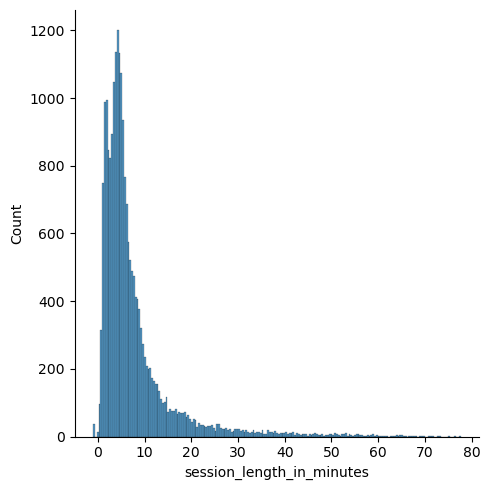

In [540]:
sns.displot(df.session_length_in_minutes)

In [541]:
df['session_length_in_minutes'] = df['session_length_in_minutes'].replace(-1, df['session_length_in_minutes'].median())

In [542]:
df[df.eq(-1).any(1)]

/tmp/ipykernel_1968/3704744187.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq(-1).any(1)]


,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
449,0,0.4,0.797761,50,20,0.024878,-1.370617,AC,2132,5041.094107,4971.903979,5129.442539,1,20,CA,-1,1,BB,0,1,15,0,200.0,0,INTERNET,8.310198,windows,1,1,0,2
2872,0,0.1,0.890020,2,40,13.501326,-0.900055,AD,1503,3955.859921,4468.358630,5571.451851,168,9,CA,-1,1,BB,0,1,10,0,200.0,0,INTERNET,4.510331,linux,1,1,0,1
7620,0,0.5,0.886443,48,30,0.020237,-0.926219,AC,1459,7074.685419,3909.700006,5626.293010,2,13,CF,-1,1,BC,0,1,15,1,200.0,0,INTERNET,12.921366,linux,0,1,0,1


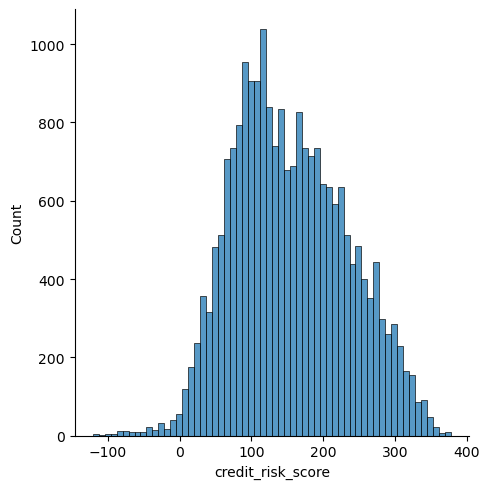

In [543]:
sns.displot(df.credit_risk_score)

In [544]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                       int64
proposed_credit_limit           

In [545]:
df.nunique()

fraud_bool                              2
income                                  9
name_email_similarity               22058
current_address_months_count          395
customer_age                            9
days_since_request                  22056
intended_balcon_amount              22057
payment_type                            5
zip_count_4w                         4191
velocity_6h                         22058
velocity_24h                        22057
velocity_4w                         22057
bank_branch_count_8w                 1527
date_of_birth_distinct_emails_4w       35
employment_status                       7
credit_risk_score                     463
email_is_free                           2
housing_status                          7
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      30
has_other_cards                         2
proposed_credit_limit                  12
foreign_request                   

In [546]:
df['employment_status'].head()

0    CA
1    CA
2    CA
3    CA
4    CC
Name: employment_status, dtype: object

-----Split Data-----

In [547]:
X = df.drop(columns=['fraud_bool'])
y = df['fraud_bool']
dicts = X.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

In [548]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

# Logistic Regression and Feature Importance

In [549]:
model_1 = LogisticRegression(max_iter=100, solver='liblinear')
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_val)
roc_auc_score(y_val, y_pred)

0.7813198691392123

In [550]:
pd.Series(model_1.coef_[0], index=dv.get_feature_names()).sort_values()

/home/deliad/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


name_email_similarity              -1.212688
has_other_cards                    -1.198019
phone_home_valid                   -1.082954
source=INTERNET                    -0.909006
device_os=linux                    -0.795656
keep_alive_session                 -0.728264
employment_status=CF               -0.724594
employment_status=CE               -0.627320
housing_status=BE                  -0.626336
device_os=other                    -0.544508
payment_type=AA                    -0.499746
housing_status=BC                  -0.415697
phone_mobile_valid                 -0.395052
housing_status=BB                  -0.367845
employment_status=CD               -0.302957
payment_type=AB                    -0.251368
payment_type=AD                    -0.201282
housing_status=BF                  -0.158187
employment_status=CB               -0.047154
housing_status=BG                  -0.037394
housing_status=BD                  -0.026693
date_of_birth_distinct_emails_4w   -0.023038
intended_b

# Random Forest

In [551]:
%%capture --no-display
estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
depth = [2, 3, 4, 5, 10, 15, 20, 25]
best = pd.DataFrame(columns=["depth", "estimators", "auc_train", "auc_val"])
for d in depth:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_train = rf.predict(X_train)
        y_pred_val = rf.predict(X_val)
        roc_auc_score_train = roc_auc_score(y_train, y_pred_train)
        roc_auc_score_val = roc_auc_score(y_val, y_pred_val)
        best = best.append({'depth':d, 'estimators':n, 'auc_train':(round(roc_auc_score_train, 5)), 'auc_val':(round(roc_auc_score_val, 5))}, ignore_index=True)

In [552]:
best.sort_values(by='auc_val')

,depth,estimators,auc_train,auc_val
0,2.0,10.0,0.74703,0.73290
2,2.0,30.0,0.75216,0.74241
1,2.0,20.0,0.75290,0.74462
3,2.0,40.0,0.75488,0.74487
26,3.0,20.0,0.75647,0.74601
...,...,...,...,...
192,25.0,180.0,1.00000,0.78996
199,25.0,250.0,1.00000,0.78996
194,25.0,200.0,1.00000,0.79041
187,25.0,130.0,1.00000,0.79132


As best depth was maximum, running again with greater depths...

In [657]:
%%capture --no-display
estimators = [80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
depth = [25, 30, 35, 40, 45, 50]
best = pd.DataFrame(columns=["depth", "estimators", "auc_train", "auc_val"])
for d in depth:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_train = rf.predict(X_train)
        y_pred_val = rf.predict(X_val)
        roc_auc_score_train = roc_auc_score(y_train, y_pred_train)
        roc_auc_score_val = roc_auc_score(y_val, y_pred_val)
        best = best.append({'depth':d, 'estimators':n, 'auc_train':(round(roc_auc_score_train, 5)), 'auc_val':(round(roc_auc_score_val, 5))}, ignore_index=True)

In [658]:
best.sort_values(by='auc_val')

,depth,estimators,auc_train,auc_val
0,25.0,80.0,1.0,0.78501
2,25.0,100.0,1.0,0.78588
3,25.0,110.0,1.0,0.78611
16,25.0,240.0,1.0,0.78678
1,25.0,90.0,1.0,0.78703
...,...,...,...,...
66,40.0,200.0,1.0,0.79269
67,40.0,210.0,1.0,0.79360
103,50.0,210.0,1.0,0.79360
85,45.0,210.0,1.0,0.79360


In [659]:
rf = RandomForestClassifier(n_estimators=210, max_depth=35, random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_val = rf.predict(X_val)
roc_auc_score_train = roc_auc_score(y_train, y_pred_train)
roc_auc_score_val = roc_auc_score(y_val, y_pred_val)
roc_auc_score_val

0.7936028638127178

In [661]:
pd.Series(rf.feature_importances_, index=dv.get_feature_names()).sort_values()

/home/deliad/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


device_fraud_count                  0.000000
payment_type=AE                     0.000000
housing_status=BG                   0.000003
employment_status=CG                0.000064
housing_status=BF                   0.000096
source=TELEAPP                      0.000671
source=INTERNET                     0.000708
device_os=x11                       0.000802
employment_status=CD                0.001103
employment_status=CE                0.001339
housing_status=BD                   0.001892
employment_status=CF                0.002279
foreign_request                     0.002477
employment_status=CC                0.003046
device_os=macintosh                 0.003608
payment_type=AD                     0.003938
phone_mobile_valid                  0.004679
employment_status=CB                0.004778
payment_type=AB                     0.005418
payment_type=AC                     0.006259
employment_status=CA                0.006390
housing_status=BB                   0.006808
payment_ty

# XGBoost

In [734]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.get_feature_names())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.get_feature_names())
watchlist = [(dtrain, 'train'), (dval, 'val')]
columns = ['eta', 'depth', 'iter_num', 'train_auc', 'val_auc']
total = pd.DataFrame(columns=columns)
def parse_xgb_output(output, e, d):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((e, d, it, train, val))
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

/home/deliad/anaconda3/envs/ml-zoomcamp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Tuning depth

In [735]:
%%capture output

eta = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
depth = 1
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [736]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.3,1,99,0.89162,0.88384
98,0.3,1,98,0.89152,0.88367
97,0.3,1,97,0.89143,0.88366
96,0.3,1,96,0.89132,0.88341
95,0.3,1,95,0.89119,0.88334


In [737]:
%%capture output

depth = 2
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [738]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.3,2,99,0.90553,0.88424
98,0.3,2,98,0.90538,0.88420
97,0.3,2,97,0.90532,0.88416
96,0.3,2,96,0.90521,0.88407
95,0.3,2,95,0.90509,0.88398


In [739]:
%%capture output

depth = 3
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [740]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
77,0.3,3,77,0.91991,0.88259
65,0.3,3,65,0.91650,0.88257
84,0.3,3,84,0.92134,0.88256
66,0.3,3,66,0.91677,0.88256
78,0.3,3,78,0.92027,0.88256


In [741]:
%%capture output

depth = 4
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [742]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
46,0.3,4,46,0.92659,0.87751
40,0.3,4,40,0.92356,0.87742
42,0.3,4,42,0.92431,0.87741
43,0.3,4,43,0.92494,0.87739
41,0.3,4,41,0.92392,0.87737


In [743]:
%%capture output

depth = 5
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [744]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
24,0.3,5,24,0.93032,0.87565
30,0.3,5,30,0.93675,0.87544
25,0.3,5,25,0.93145,0.87544
29,0.3,5,29,0.93545,0.87540
31,0.3,5,31,0.93747,0.87524


In [745]:
%%capture output

depth = 6
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [746]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
23,0.3,6,23,0.95127,0.86884
24,0.3,6,24,0.95249,0.86871
22,0.3,6,22,0.95049,0.86865
21,0.3,6,21,0.94860,0.86827
20,0.3,6,20,0.94713,0.86806


In [747]:
%%capture output

depth = 7
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [749]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
24,0.3,7,24,0.97296,0.86403
18,0.3,7,18,0.96657,0.86355
19,0.3,7,19,0.96740,0.86347
25,0.3,7,25,0.97418,0.86345
23,0.3,7,23,0.97145,0.86343


In [750]:
%%capture output

depth = 8
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [751]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
15,0.3,8,15,0.97979,0.85441
13,0.3,8,13,0.97757,0.85416
14,0.3,8,14,0.97908,0.85415
12,0.3,8,12,0.97590,0.85413
16,0.3,8,16,0.98158,0.85405


In [752]:
%%capture output

depth = 9
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [753]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
26,0.3,9,26,0.99732,0.85309
27,0.3,9,27,0.99743,0.85294
25,0.3,9,25,0.99664,0.85288
24,0.3,9,24,0.99611,0.85262
28,0.3,9,28,0.99767,0.85253


In [754]:
%%capture output

depth = 10
xgb_params = {
    'eta': 0.3,
    'max_depth': depth,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [755]:
parse_xgb_output(output, 0.3, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
15,0.3,10,15,0.99723,0.84776
14,0.3,10,14,0.99682,0.84774
23,0.3,10,23,0.99903,0.84728
21,0.3,10,21,0.99884,0.84726
13,0.3,10,13,0.99656,0.84724


-----Using best depth (2) tuning eta-----

In [776]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [777]:
parse_xgb_output(output, 0.01, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.01,10,99,0.81813,0.80980
98,0.01,10,98,0.81795,0.80953
97,0.01,10,97,0.81779,0.80940
96,0.01,10,96,0.81763,0.80928
95,0.01,10,95,0.81735,0.80897


In [778]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [779]:
parse_xgb_output(output, 0.05, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.05,10,99,0.87527,0.86751
98,0.05,10,98,0.87494,0.86725
97,0.05,10,97,0.87462,0.86703
96,0.05,10,96,0.87431,0.86682
95,0.05,10,95,0.87410,0.86664


In [780]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [781]:
parse_xgb_output(output, 0.1, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.1,10,99,0.88956,0.87814
98,0.1,10,98,0.88939,0.87813
97,0.1,10,97,0.88917,0.87798
96,0.1,10,96,0.88897,0.87776
95,0.1,10,95,0.88873,0.87769


In [782]:
%%capture output

xgb_params = {
    'eta': 0.15,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [783]:
parse_xgb_output(output, 0.15, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.15,10,99,0.89682,0.88297
98,0.15,10,98,0.89671,0.88289
96,0.15,10,96,0.89636,0.88281
97,0.15,10,97,0.89651,0.88280
95,0.15,10,95,0.89610,0.88259


In [784]:
%%capture output

xgb_params = {
    'eta': 0.2,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [785]:
parse_xgb_output(output, 0.2, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.2,10,99,0.90104,0.88383
98,0.2,10,98,0.90095,0.88378
95,0.2,10,95,0.90049,0.88364
97,0.2,10,97,0.90076,0.88363
96,0.2,10,96,0.90066,0.88362


In [786]:
%%capture output

xgb_params = {
    'eta': 0.25,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [787]:
parse_xgb_output(output, 0.25, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
95,0.25,10,95,0.90332,0.88485
99,0.25,10,99,0.90392,0.88483
94,0.25,10,94,0.90315,0.88483
93,0.25,10,93,0.90300,0.88478
98,0.25,10,98,0.90375,0.88478


In [788]:
%%capture output

xgb_params = {
    'eta': 0.35,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [789]:
parse_xgb_output(output, 0.35, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
99,0.35,10,99,0.90785,0.88389
94,0.35,10,94,0.90708,0.88387
98,0.35,10,98,0.90779,0.88385
97,0.35,10,97,0.90761,0.88382
93,0.35,10,93,0.90688,0.88377


In [790]:
%%capture output

xgb_params = {
    'eta': 0.4,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [791]:
parse_xgb_output(output, 0.4, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
98,0.4,10,98,0.90877,0.88481
92,0.4,10,92,0.90790,0.88467
95,0.4,10,95,0.90824,0.88465
99,0.4,10,99,0.90898,0.88463
96,0.4,10,96,0.90834,0.88460


In [792]:
%%capture output

xgb_params = {
    'eta': 0.45,
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [793]:
parse_xgb_output(output, 0.45, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
93,0.45,10,93,0.90878,0.88354
92,0.45,10,92,0.90856,0.88354
91,0.45,10,91,0.90844,0.88348
86,0.45,10,86,0.90769,0.88342
87,0.45,10,87,0.90788,0.88341


Best eta: 0.4 - other parameters:

In [846]:
%%capture output

xgb_params = {
    'eta': 0.4,
    'max_depth': 2,
    'colsample_bytree': 0.8,
    'subsample': 1,
    'min_child_weight': 1.5,
    'gamma': 0.4,
    'lambda': 10,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 42,
    'verbosity': 1,
}
xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

In [847]:
parse_xgb_output(output, 0.4, depth).sort_values(by='val_auc', ascending=False).head()

,eta,depth,iter_num,train_auc,val_auc
96,0.4,10,96,0.90803,0.88832
97,0.4,10,97,0.90820,0.88827
94,0.4,10,94,0.90782,0.88817
95,0.4,10,95,0.90793,0.88811
99,0.4,10,99,0.90862,0.88808
